In [1]:
import sklearn
from preamble import *
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rcParams['image.cmap'] = "gray"

import warnings
warnings.filterwarnings(action='ignore') # 경고 무시

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


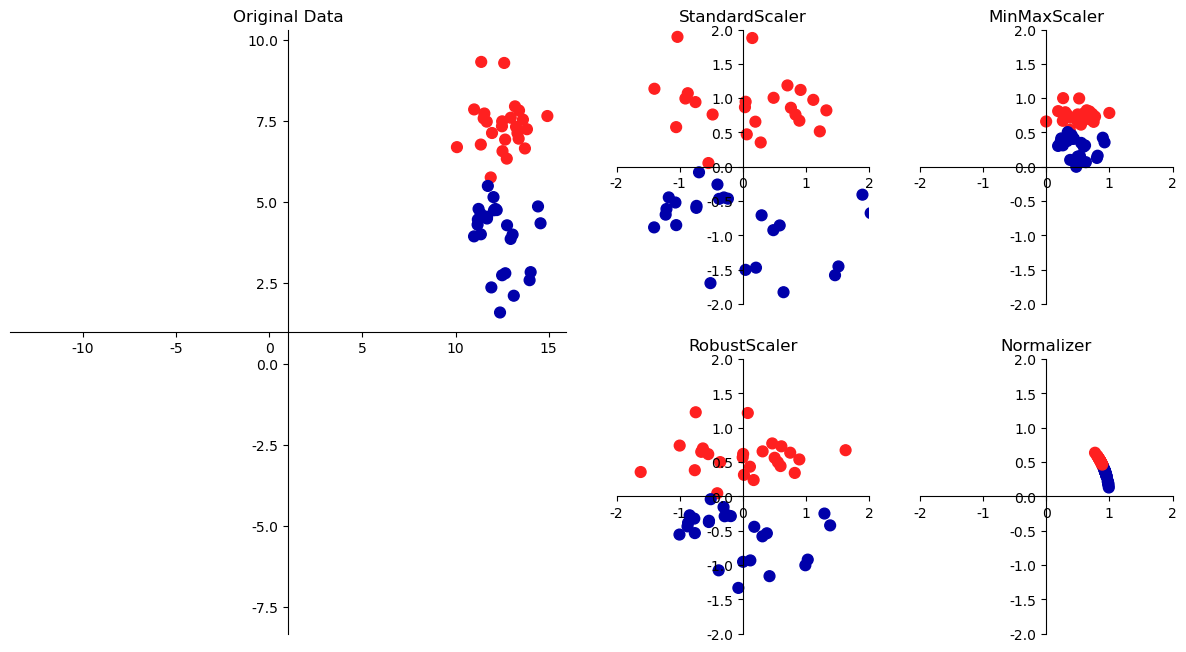

In [2]:
import mglearn

mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler()

In [6]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0000000000000002)

In [7]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.min(), X_test_scaled.max()

(-0.0319138691473585, 1.6306885105471678)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

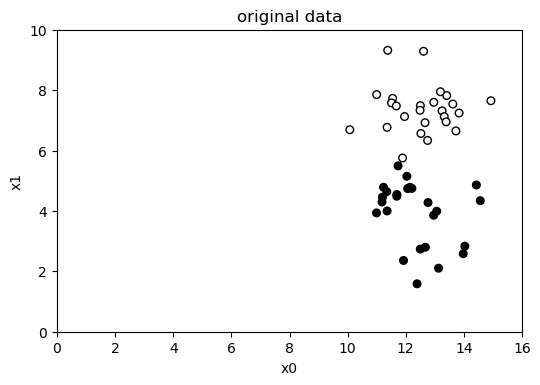

In [9]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("original data")
plt.show()

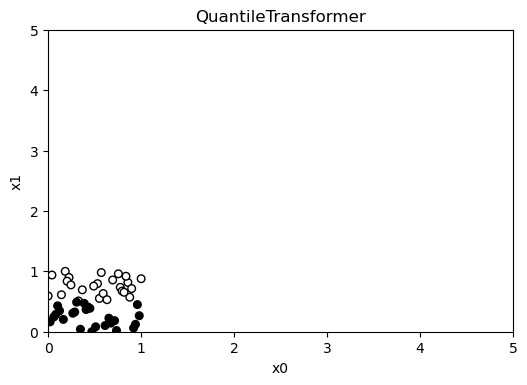

In [10]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

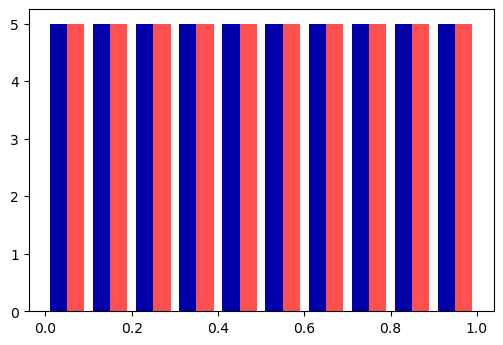

In [11]:
plt.hist(X_trans)
plt.show()

In [12]:
x = np.array([[0], [5], [8], [9], [10]])
np.percentile(x[:, 0], [0, 25, 50, 75, 100])

array([ 0.,  5.,  8.,  9., 10.])

In [13]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100])

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

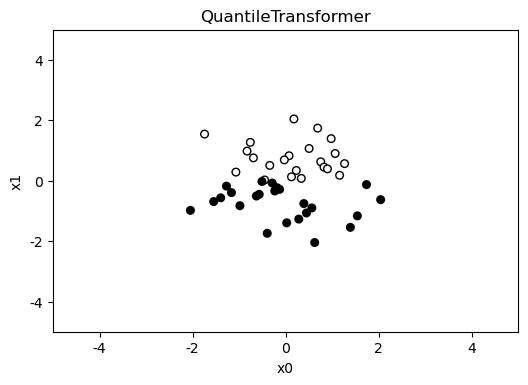

In [14]:
scaler = QuantileTransformer(n_quantiles=50, output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

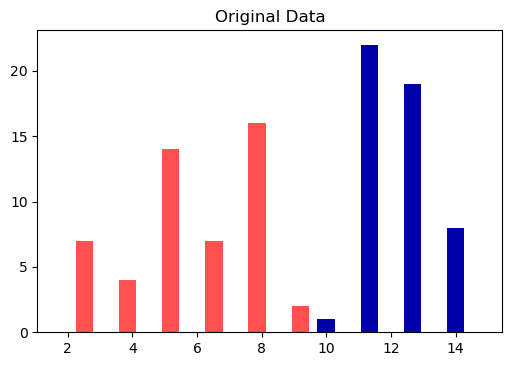

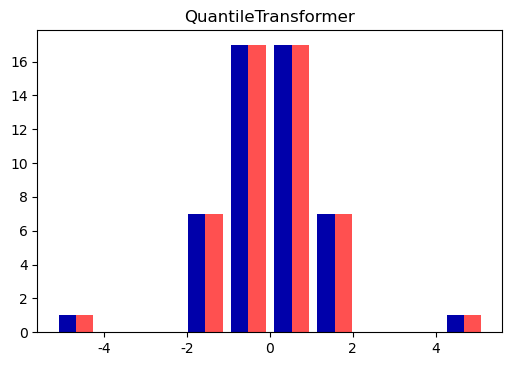

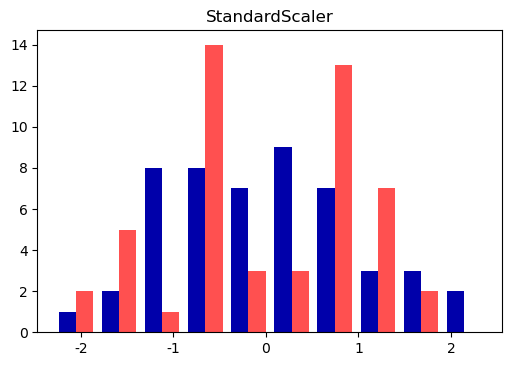

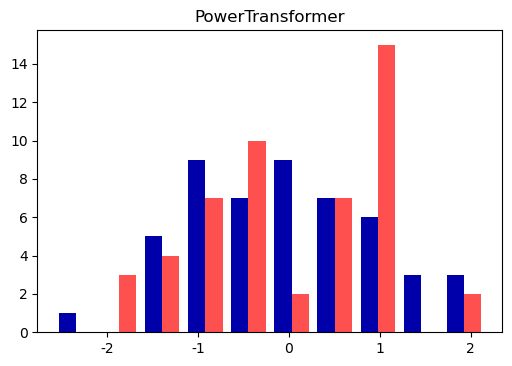

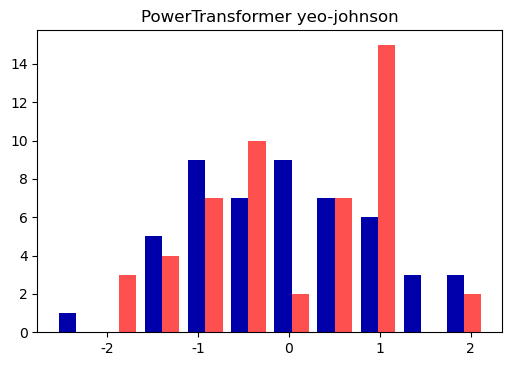

In [15]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(n_quantiles=50, output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

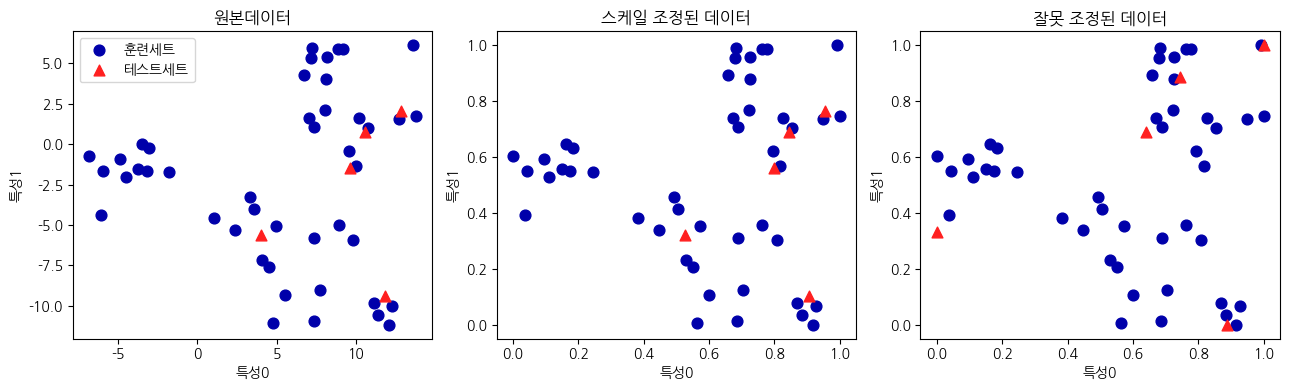

In [16]:
from sklearn.datasets import make_blobs
plt.rc('font', family='NanumGothic') # 한클
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], 
               c=mglearn.cm2.colors[0], label='훈련세트', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
               c=mglearn.cm2.colors[1], label='테스트세트', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본데이터")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
               c=mglearn.cm2.colors[0], label='훈련세트', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
               c=mglearn.cm2.colors[1], label='테스트세트', s=60)
axes[1].set_title("스케일 조정된 데이터")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
               c=mglearn.cm2.colors[0], label='훈련세트', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
               marker='^', c=mglearn.cm2.colors[1], label='테스트세트', s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel('특성0')
    ax.set_ylabel('특성1')
fig.tight_layout()

In [17]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6293706293706294

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)

0.951048951048951

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)

0.965034965034965

## PCA (Principal Component Analysis)

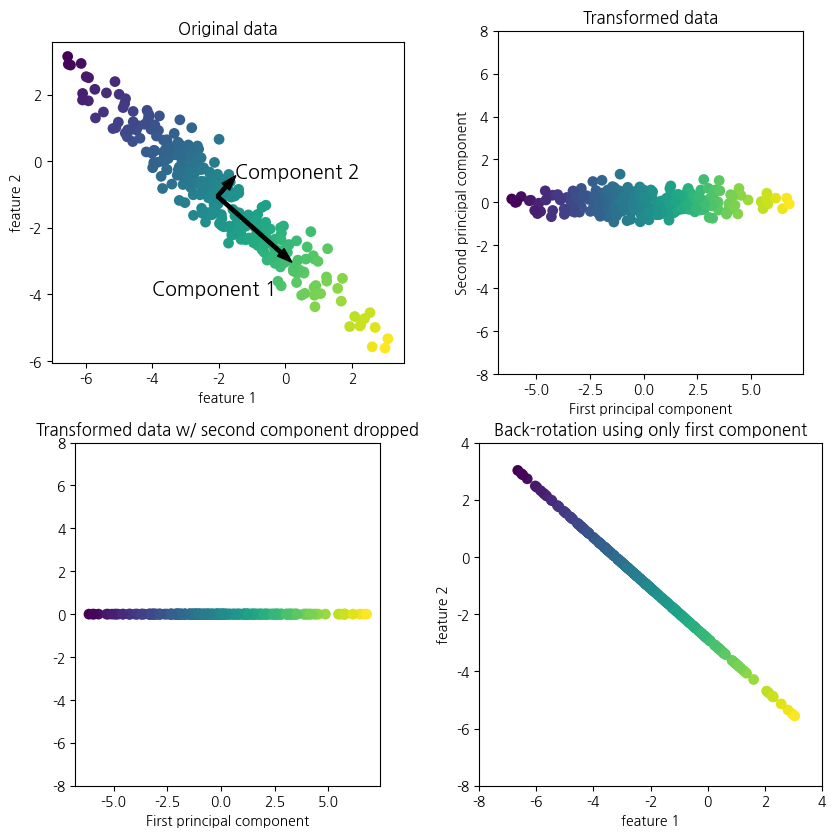

In [20]:
mglearn.plots.plot_pca_illustration()

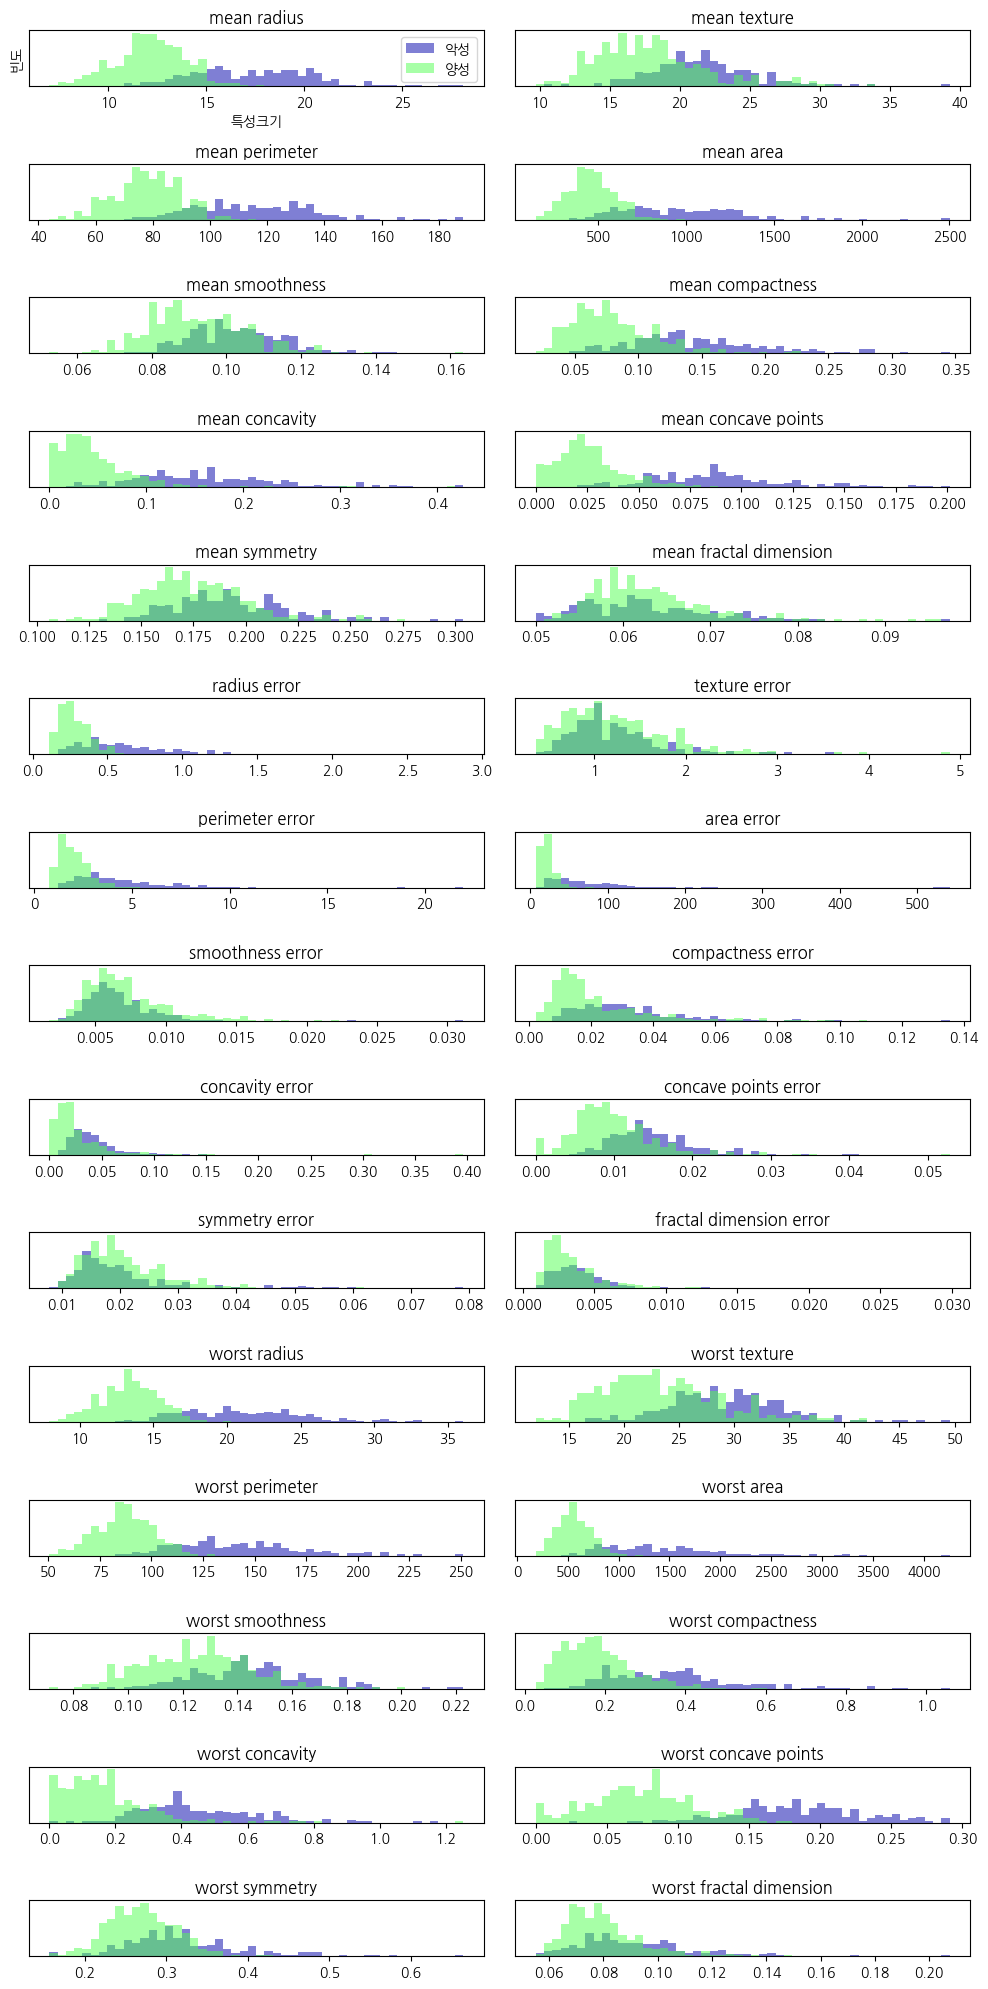

In [21]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
X_scaled.shape, X_pca.shape

((569, 30), (569, 2))

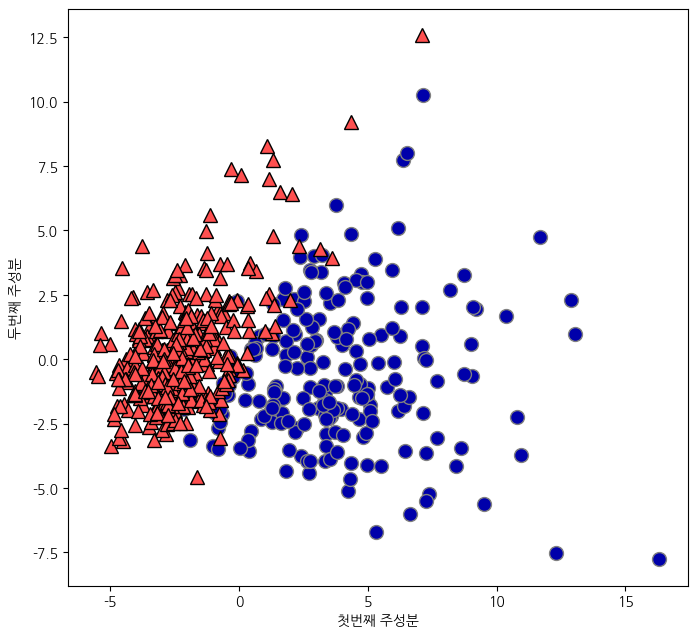

In [24]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.gca().set_aspect("equal")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

In [25]:
pca.components_.shape

(2, 30)

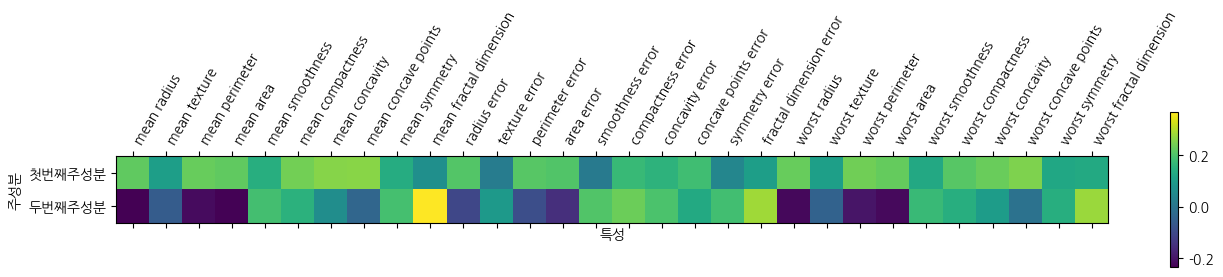

In [26]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['첫번째주성분', '두번째주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

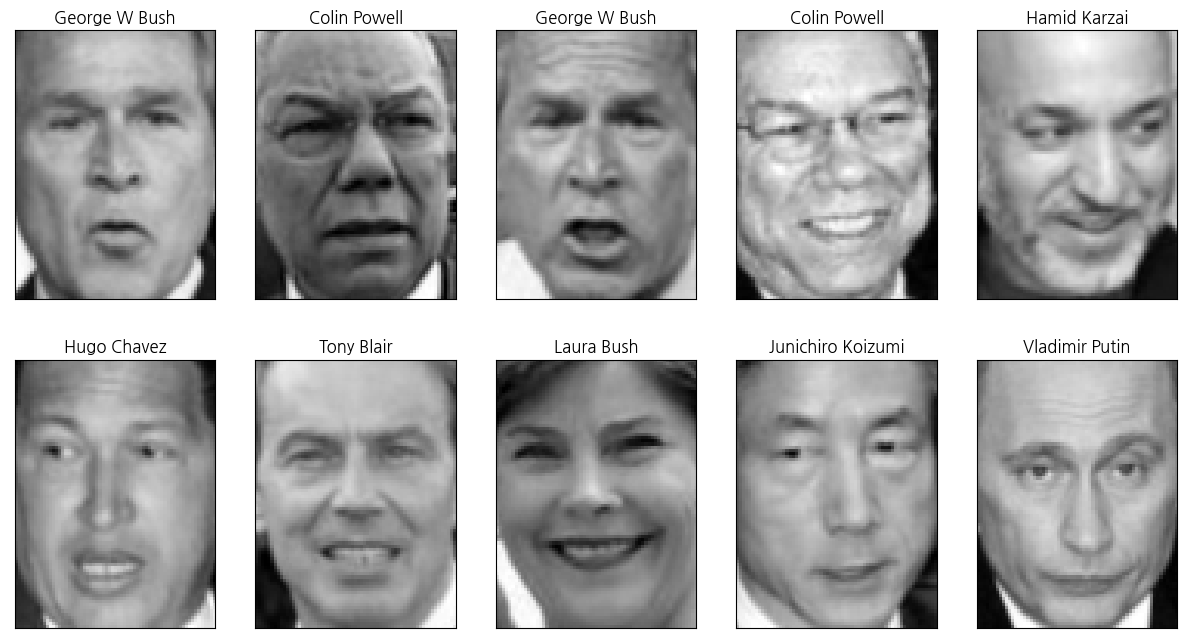

In [27]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), 
                        subplot_kw={'xticks':(), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [28]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([11,  7, 11,  7, 15, 17, 40, 28, 26, 42], dtype=int64),
 array(['George W Bush', 'Colin Powell', 'George W Bush', 'Colin Powell',
        'Hamid Karzai', 'Hugo Chavez', 'Tony Blair', 'Laura Bush',
        'Junichiro Koizumi', 'Vladimir Putin'], dtype='<U23'))

In [29]:
people.images.shape, len(people.target_names)

((2489, 87, 65), 43)

In [30]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='    ')
    if(i+1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Ariel Sharon               77    Atal Bihari Vajpayee       24    
Bill Clinton               29    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Hamid Karzai               22    Hans Blix                  39    Hugo Chavez                71    
Igor Ivanov                20    Jack Straw                 28    Jacques Chirac             52    
Jean Chretien              55    Jennifer Aniston           21    Jennifer Capriati          42    
John Ashcroft              53    Juan Carlos Ferrero        28    Junichiro Koizumi          60    
Kofi Annan                 32    Laura Bush                 41    Lindsay Davenport          22    


In [31]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.26631853785900783

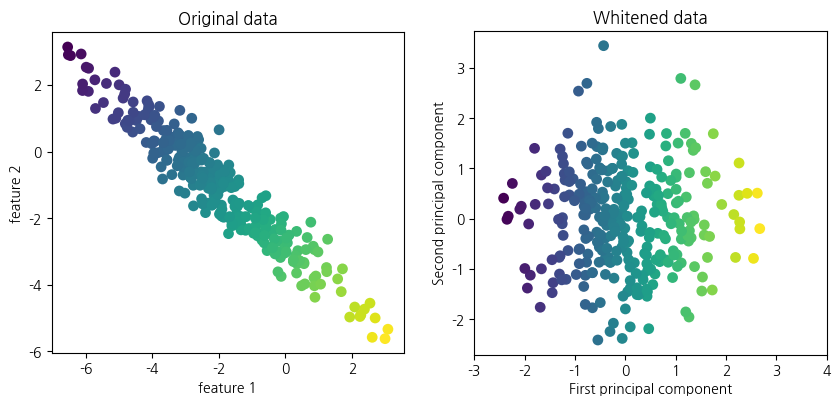

In [33]:
mglearn.plots.plot_pca_whitening()

In [34]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape

(1146, 100)

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.37597911227154046

In [36]:
pca.components_.shape

(100, 5655)

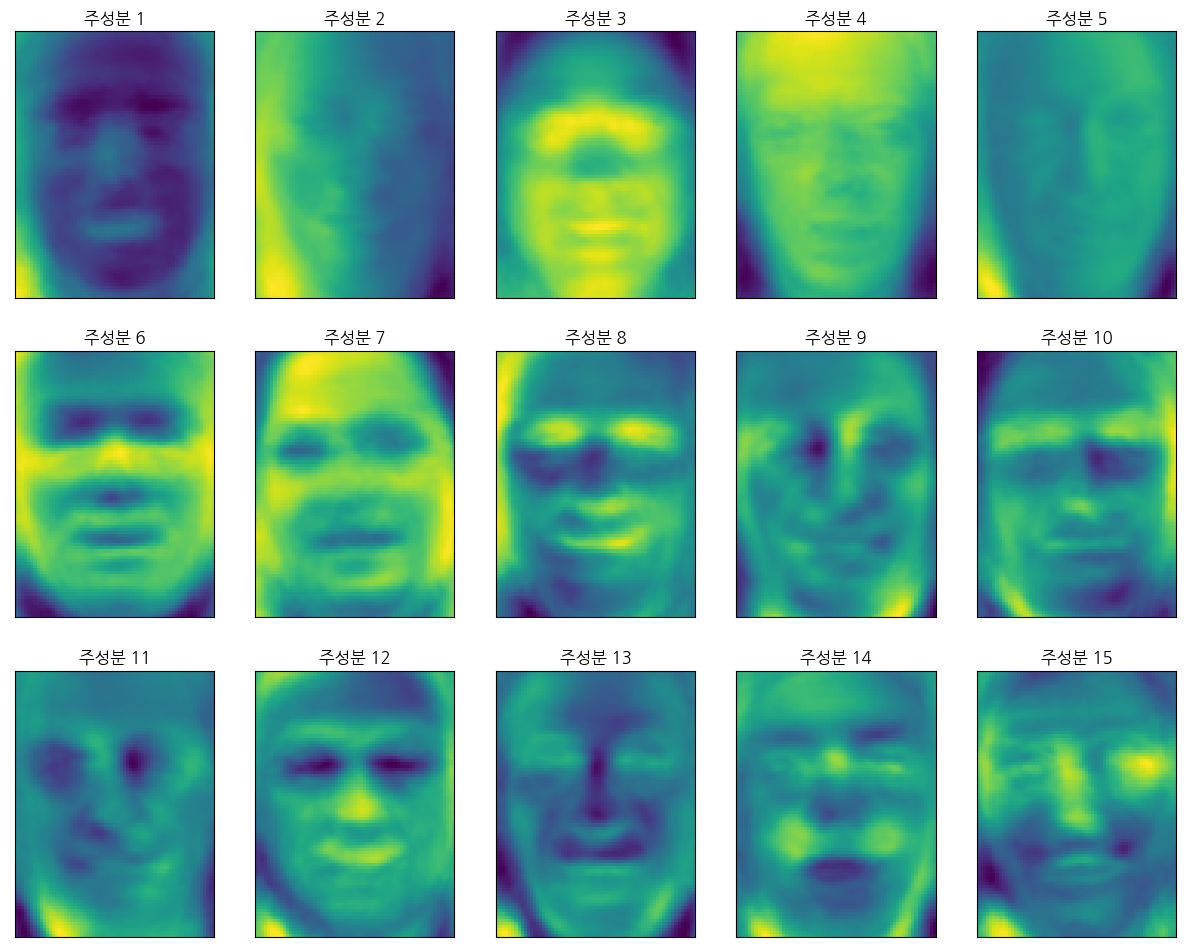

In [37]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), 
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분 {}'.format((i+1)))

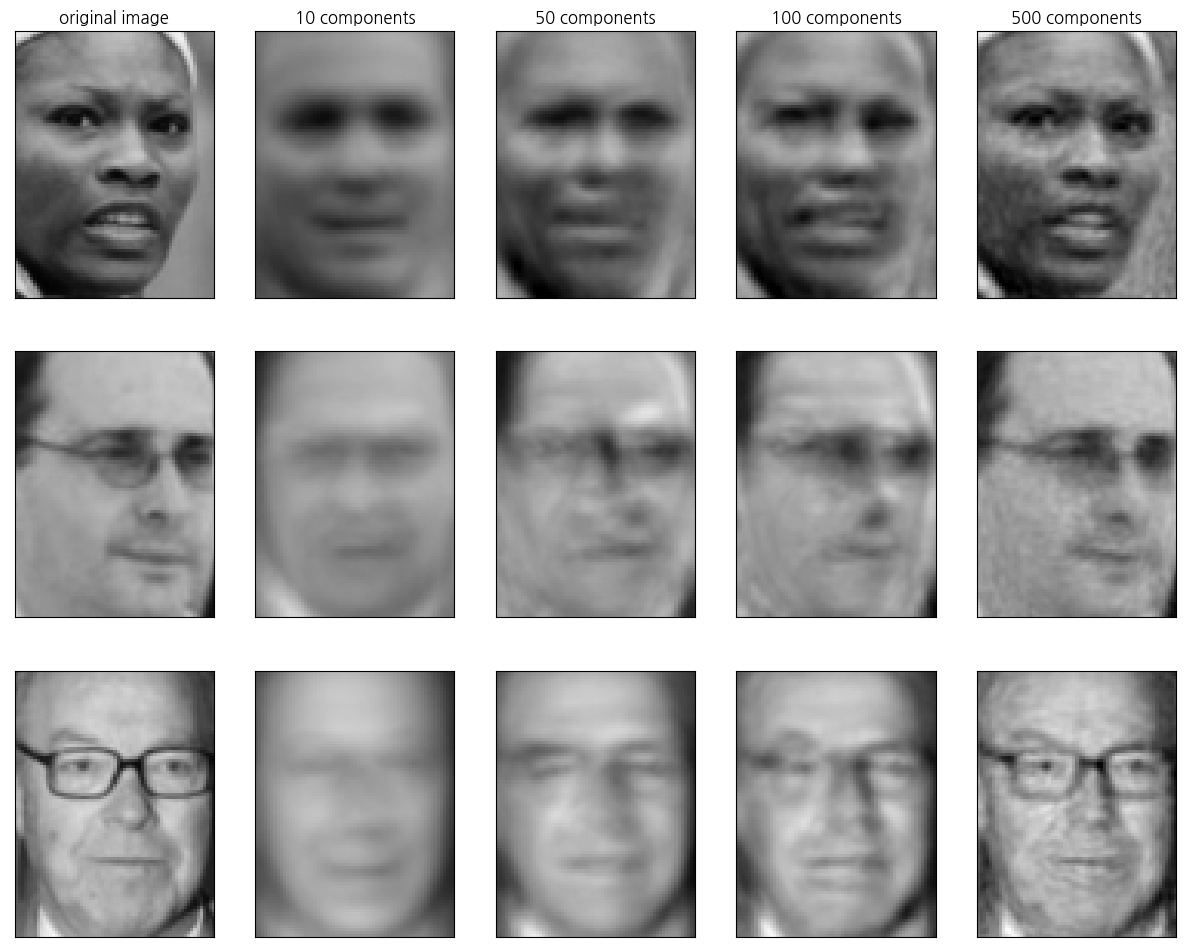

In [38]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

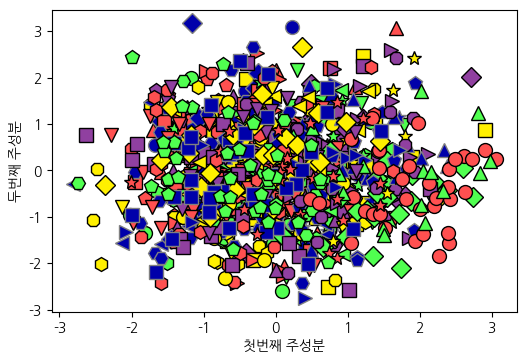

In [39]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

In [40]:
np.sum(pca.explained_variance_ratio_)

0.9081424

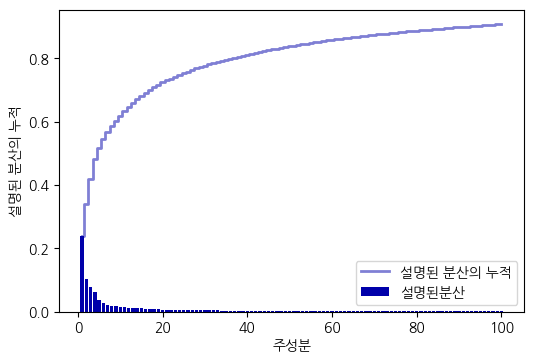

In [41]:
plt.bar(range(1, 101), pca.explained_variance_ratio_, align='center', label='설명된분산')
plt.step(range(1, 101), np.cumsum(pca.explained_variance_ratio_), alpha=0.5, 
        where='mid', label='설명된 분산의 누적')
plt.ylabel('설명된 분산의 누적')
plt.xlabel('주성분')
plt.legend()
plt.show()

In [42]:
pca = PCA(n_components=40, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.3577023498694517

## NMF ( non-negative matrix factorization )

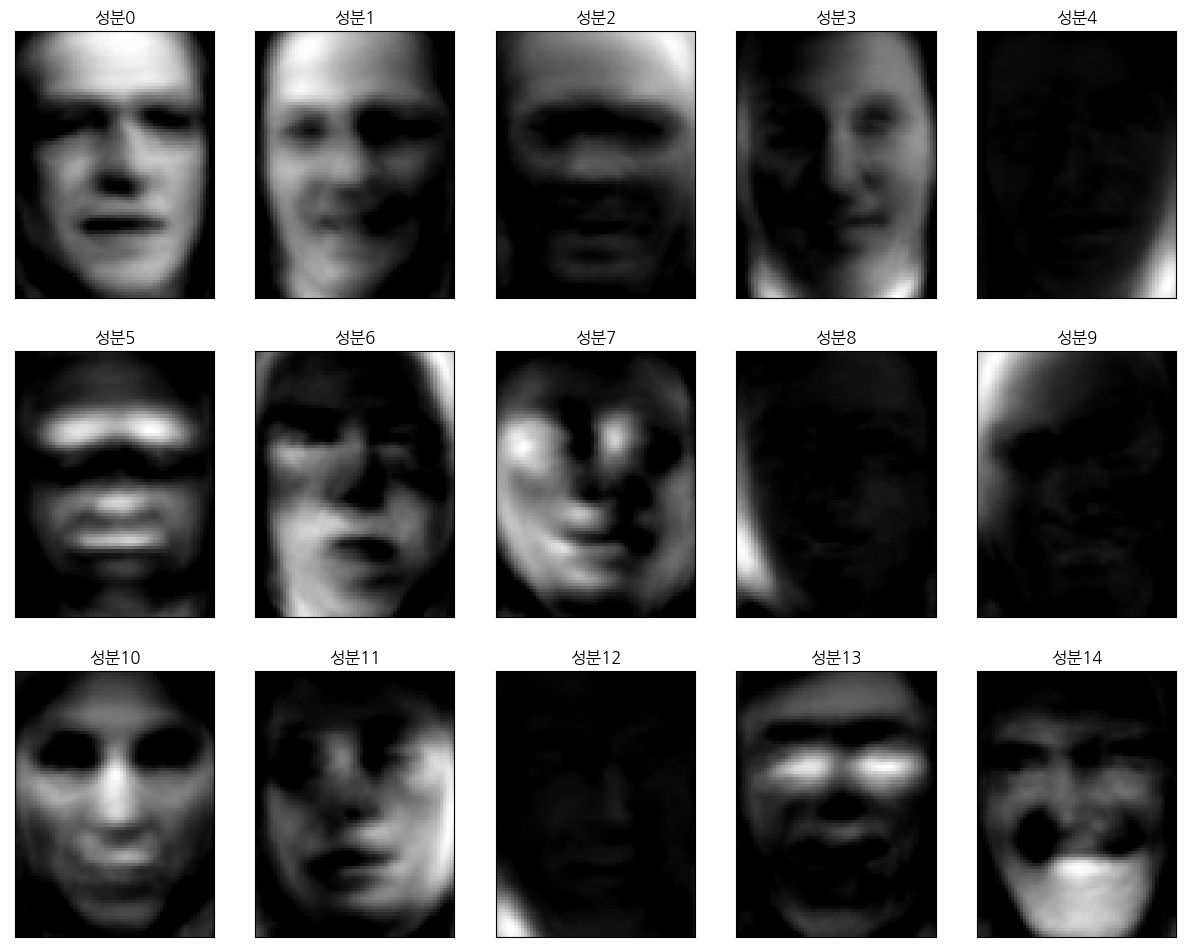

In [43]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, 
         tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), 
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분{}".format(i))

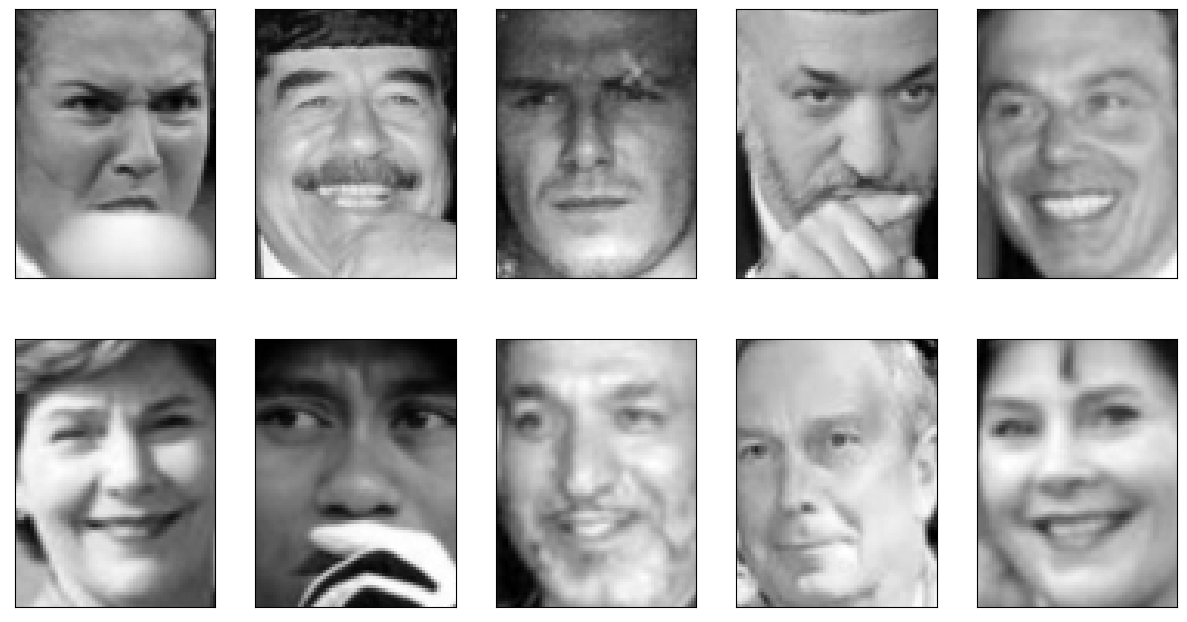

In [44]:
compn = 14
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), 
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

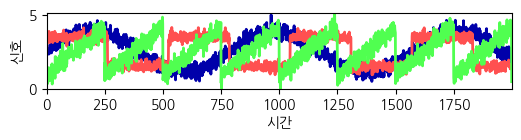

In [45]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)

In [46]:
S.shape

(2000, 3)

In [47]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
X.shape

(2000, 100)

In [48]:
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000,
         tol=1e-2)
S_ = nmf.fit_transform(X)
S_.shape

(2000, 3)

In [49]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

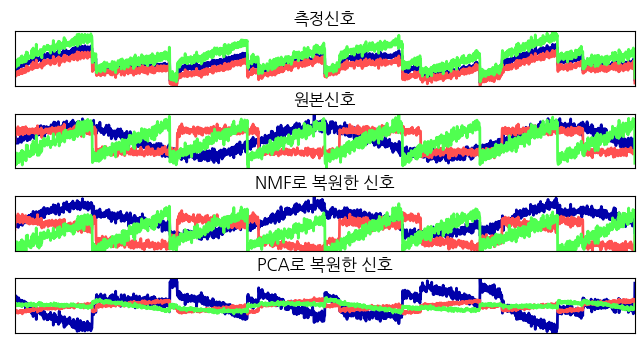

In [50]:
models = [X, S, S_, H]
names = ['측정신호', '원본신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                        subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

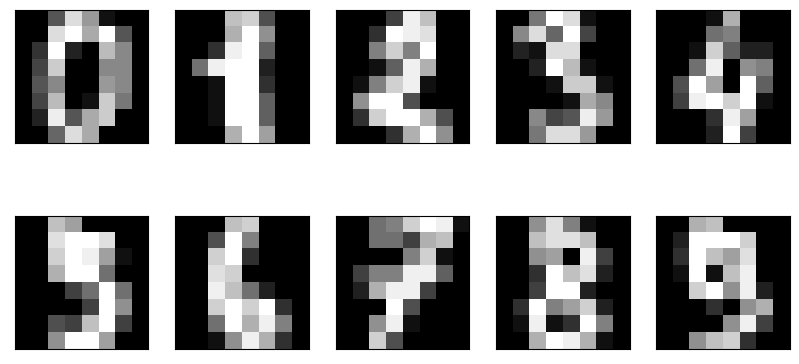

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), 
                        subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [52]:
digits.data.shape

(1797, 64)

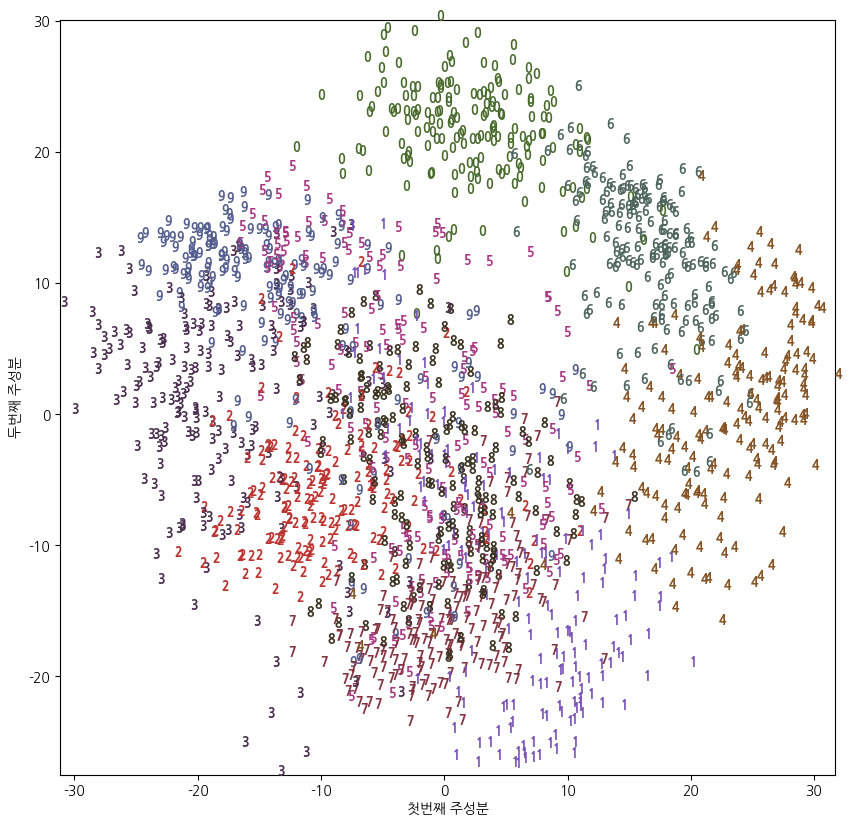

In [53]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), 
            color = colors[digits.target[i]], 
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

In [54]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

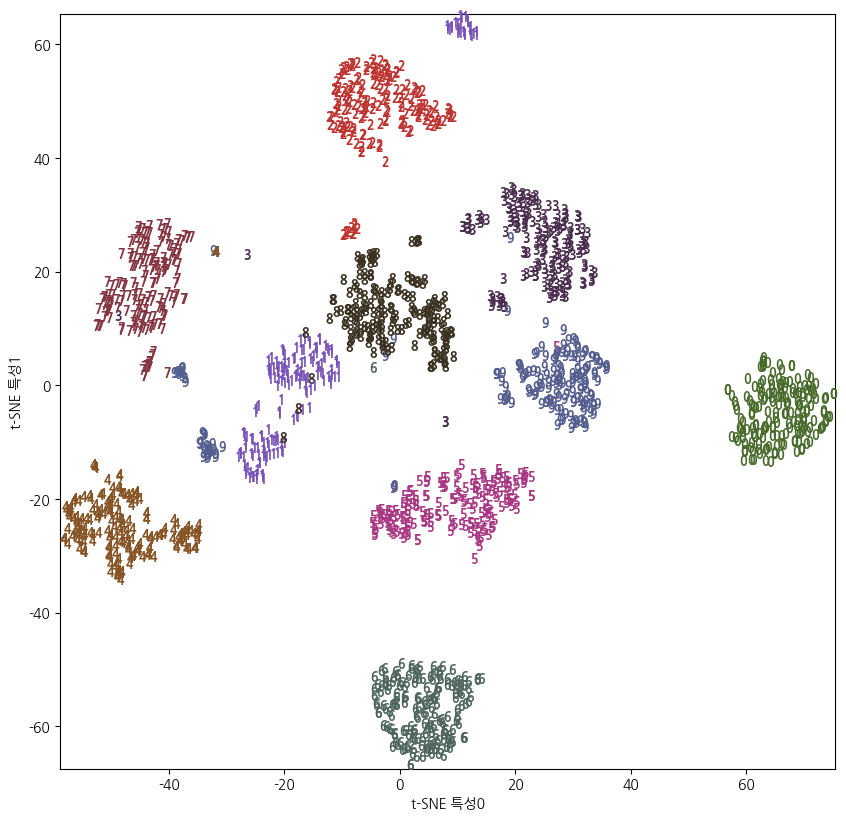

In [55]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), 
            color=colors[digits.target[i]], 
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성0")
plt.ylabel("t-SNE 특성1")
plt.show()

In [56]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [57]:
kmeans.labels_

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, init='nndsvd', max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

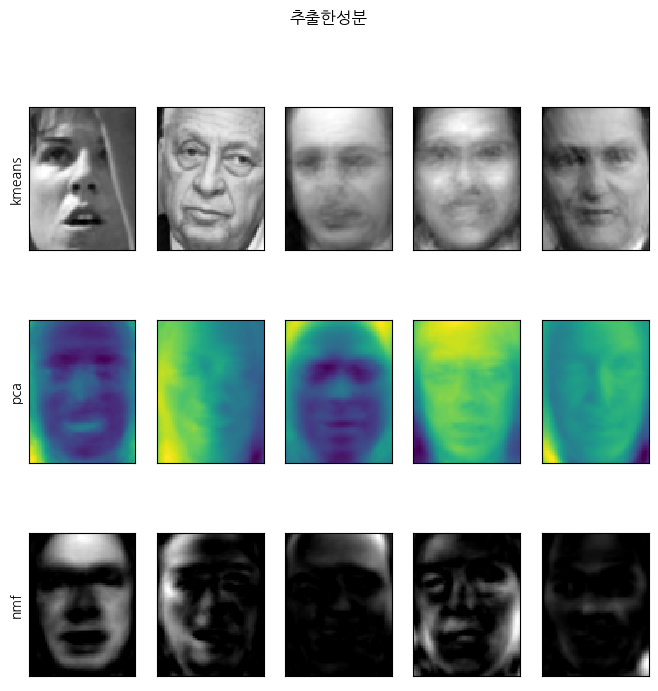

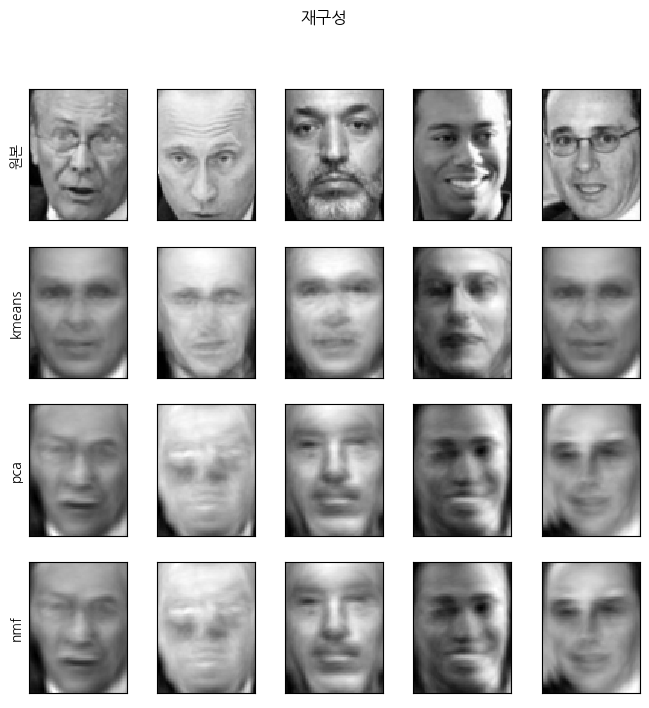

In [59]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_nmf.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()

In [60]:
pca.components_.shape, X_train.shape, kmeans.cluster_centers_.shape

((100, 5655), (1146, 5655), (100, 5655))

## agglomerative clustering

Text(0, 0.5, '특성1')

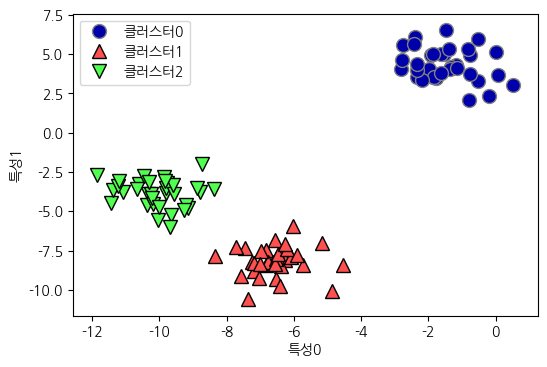

In [61]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(['클러스터0', '클러스터1', '클러스터2'], loc='best')
plt.xlabel('특성0')
plt.ylabel('특성1')

## 계층적 군집과 덴드로그램

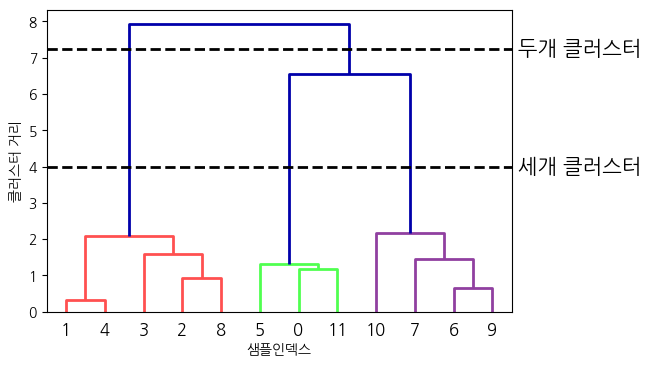

In [62]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플인덱스")
plt.ylabel("클러스터 거리")
plt.show()

## DBSCAN

In [63]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

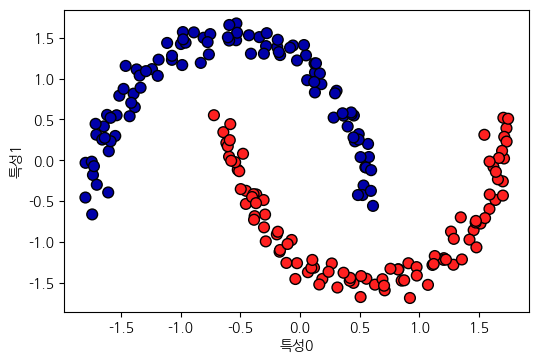

In [64]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.show()

## 군집알고리즘 비교 평가

### 타겟값 이용

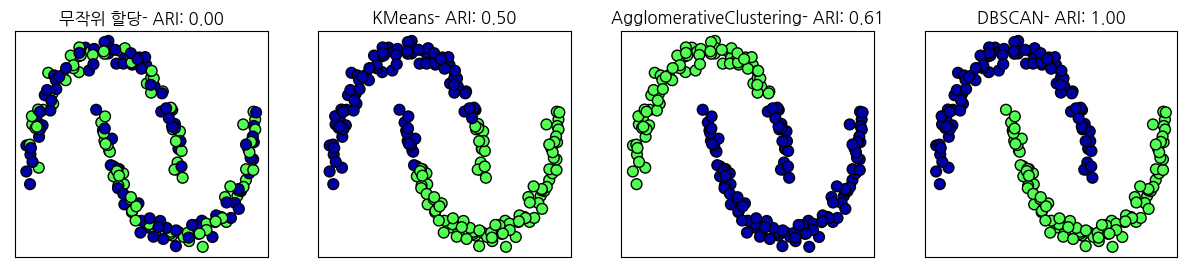

In [65]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
             DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, 
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당- ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, 
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{}- ARI: {:.2f}'.format(algorithm.__class__.__name__, 
                                          adjusted_rand_score(y, clusters)))

### 타깃값 이용 x

#### silhouette coefficient

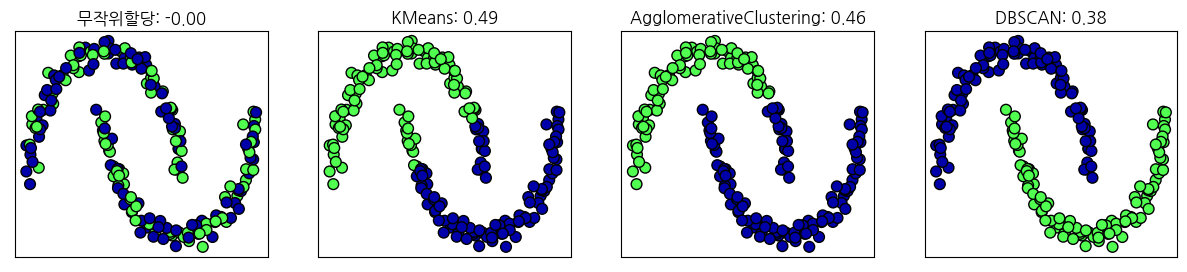

In [66]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), 
                         subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위할당: {:.2f}".format(
            silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), 
             DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
              s=60, edgecolors='black')
    ax.set_title("{}: {:.2f}".format(algorithm.__class__.__name__,
                                    silhouette_score(X_scaled, clusters)))

### 얼굴 데이터셋으로 군집알고리즘 비교

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [68]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

array([-1], dtype=int64)

In [69]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

array([-1], dtype=int64)

In [70]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

array([-1,  0], dtype=int64)

In [71]:
np.bincount(labels+1)

array([  25, 1504], dtype=int64)

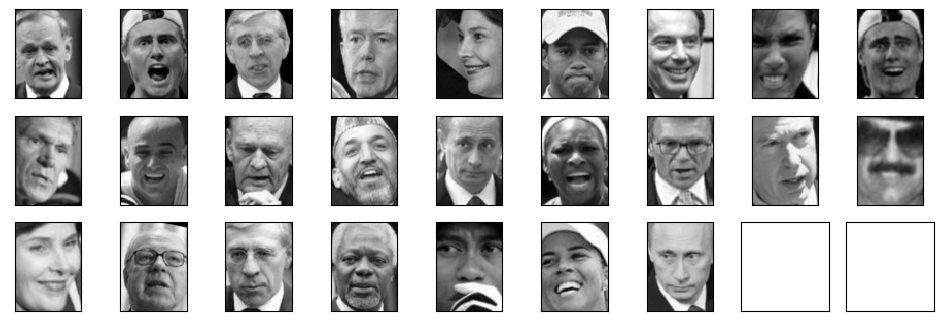

In [72]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                        figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [73]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수: ", len(np.unique(labels)))
    print("클러스터 크기: ", np.bincount(labels+1))


eps= 1
클러스터 수:  1
클러스터 크기:  [1529]

eps= 3
클러스터 수:  1
클러스터 크기:  [1529]

eps= 5
클러스터 수:  1
클러스터 크기:  [1529]

eps= 7
클러스터 수:  12
클러스터 크기:  [1477    3    3   12   12    3    3    3    3    3    4    3]

eps= 9
클러스터 수:  5
클러스터 크기:  [959 561   3   3   3]

eps= 11
클러스터 수:  2
클러스터 크기:  [ 324 1205]

eps= 13
클러스터 수:  2
클러스터 크기:  [  98 1431]


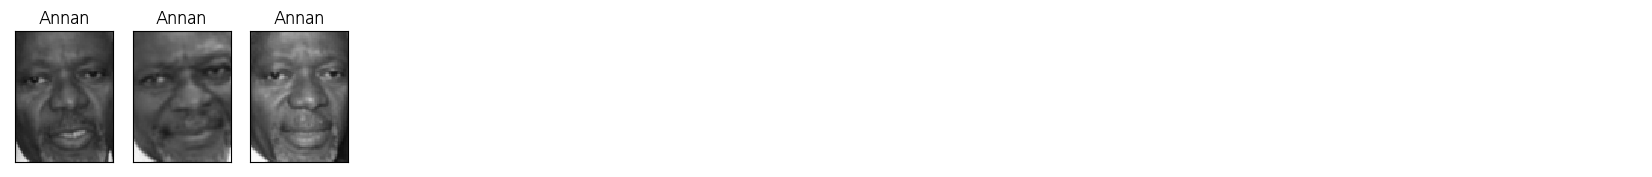

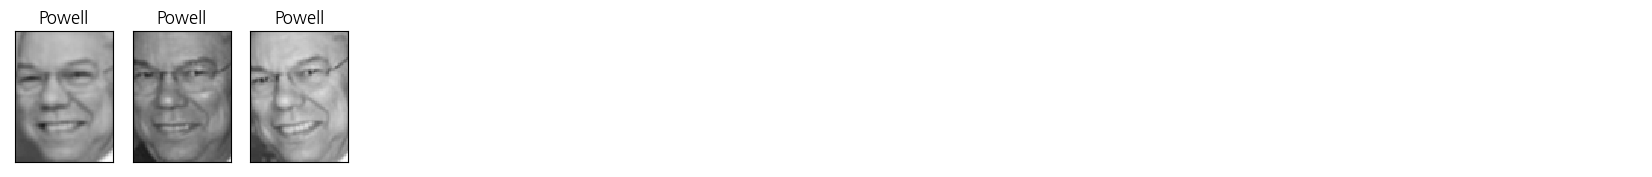

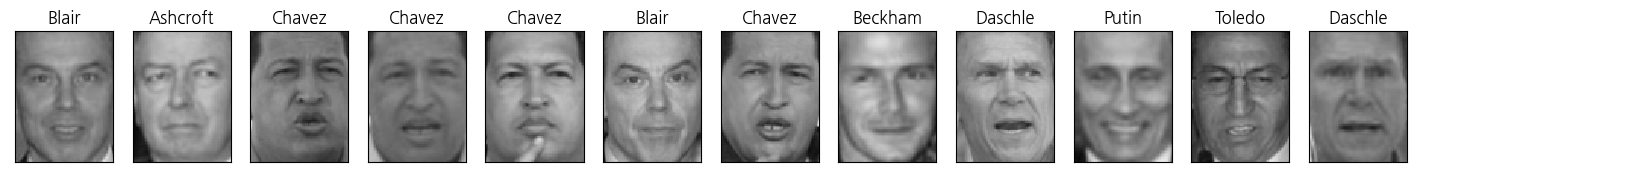

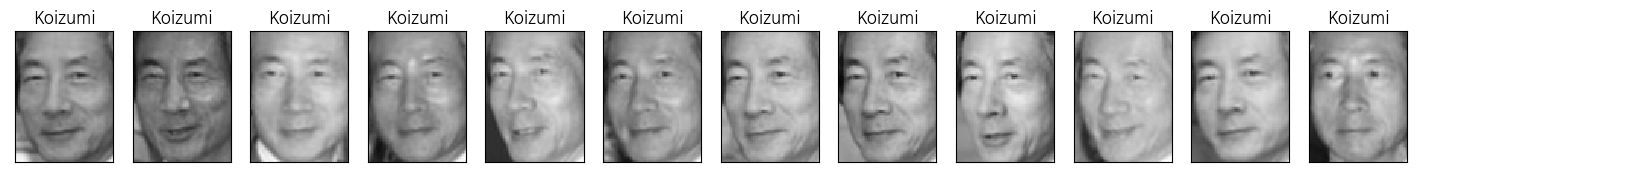

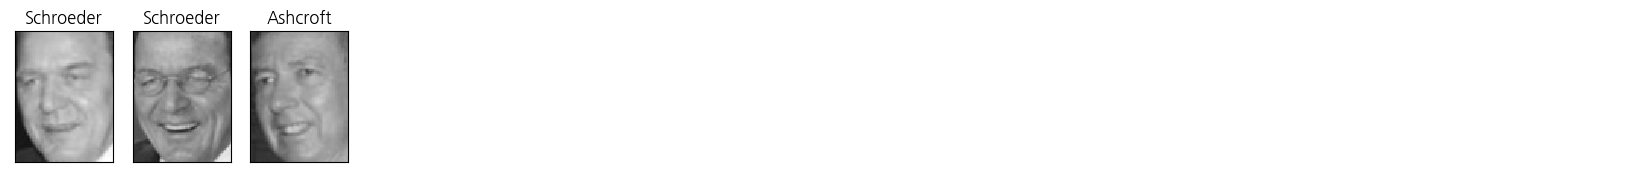

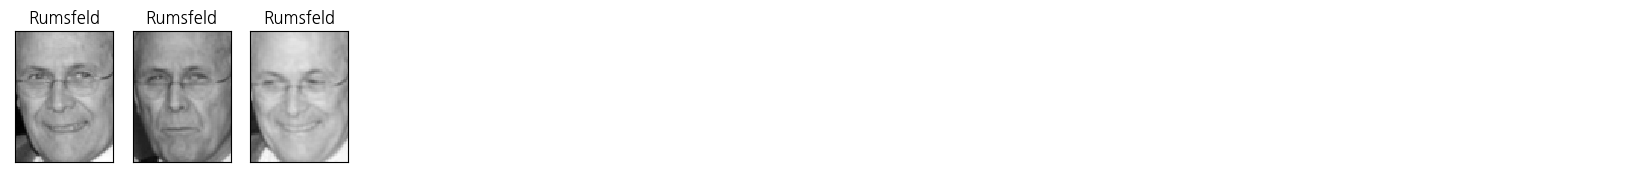

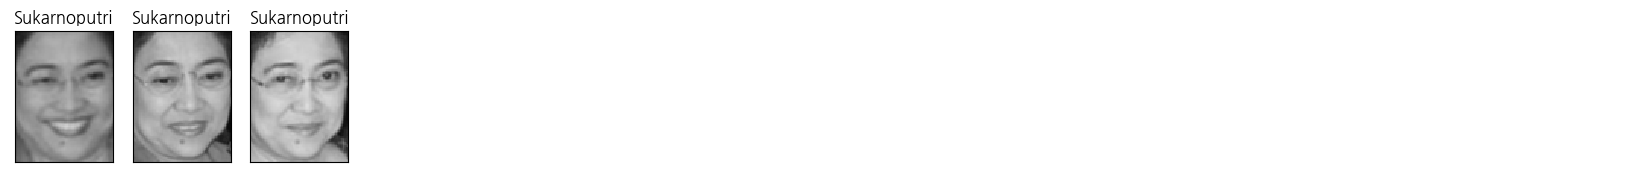

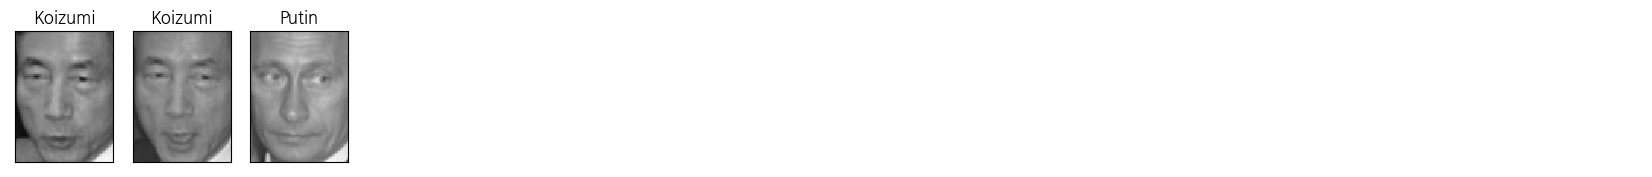

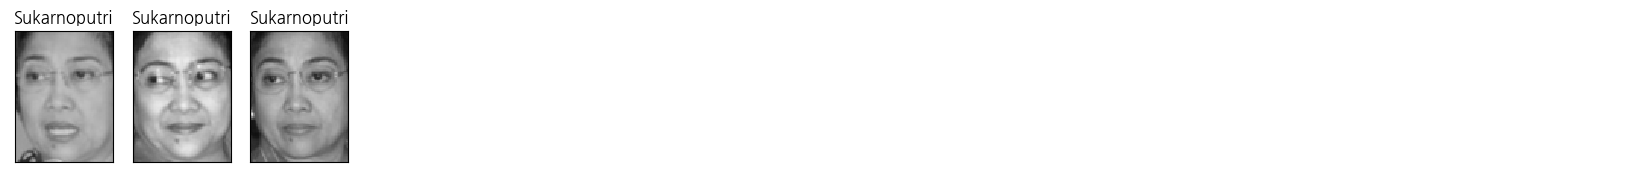

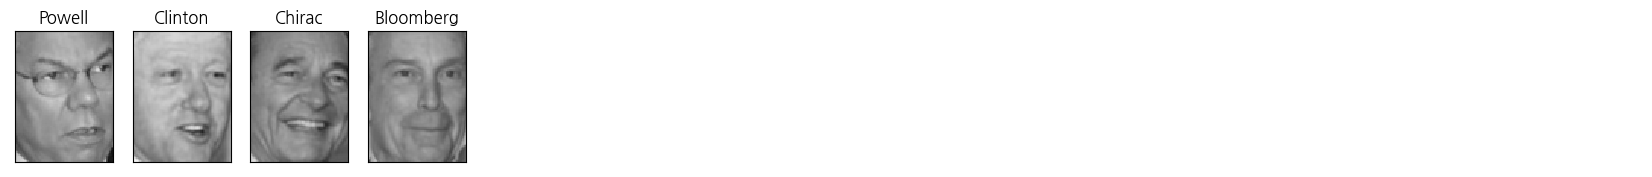

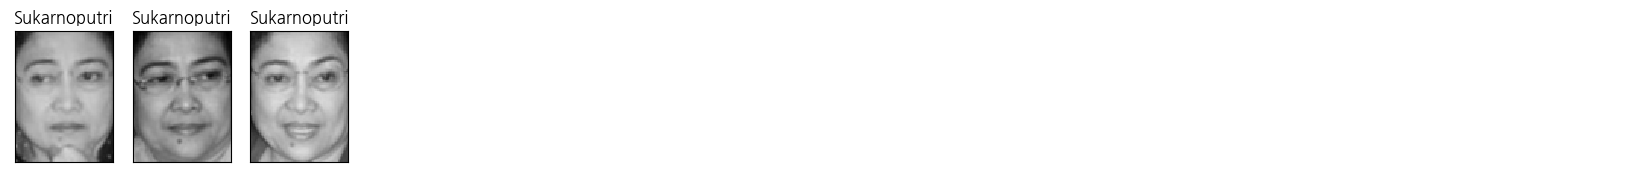

In [75]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4), 
                            subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes)-i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

In [76]:
n_clusters = 10
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기: ", np.bincount(labels_km))

k-평균의 클러스터 크기:  [ 98 224 107 175 116 220 358  92  93  46]


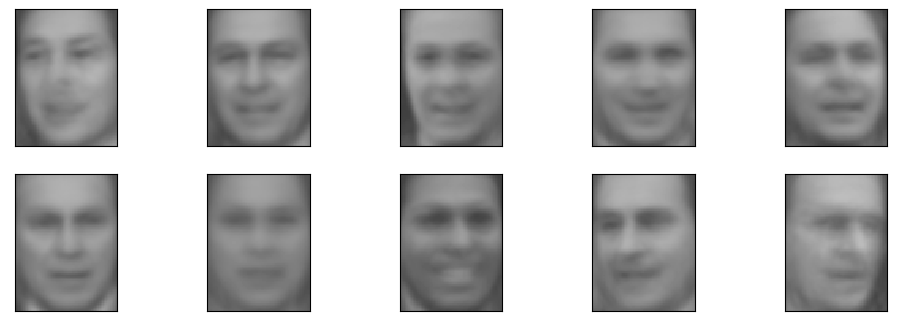

In [77]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, 
                        figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

In [78]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
np.bincount(labels_agg)

array([235,  54,  65, 203,  66, 428, 124,  47, 299,   8], dtype=int64)

In [79]:
adjusted_rand_score(labels_agg, labels_km)

0.08245449255344618

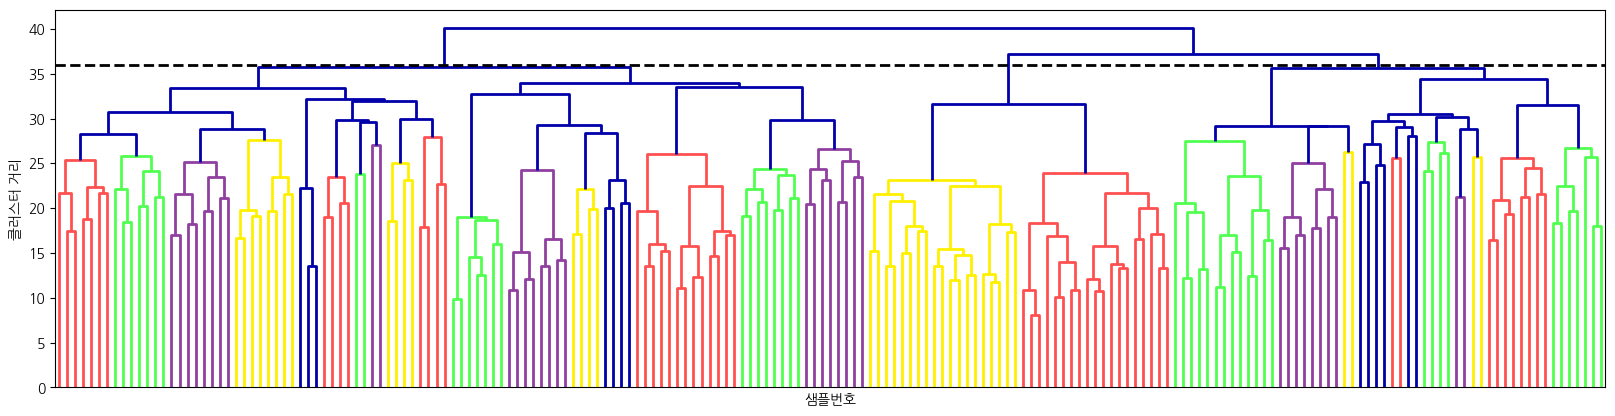

In [81]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')